<h1> <b>Prediksi Harga Rumah<b> <h1> 

# Import Library

Mengimpor library yang dibutuhkan


In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Data Loading

Mengunduh data di https://www.kaggle.com/datasets/harlfoxem/housesalesprediction 

Kolom atau variabel pada dataset adalah:

*   id: ID unik untuk setiap rumah yang terjual
*   date: Tanggal penjualan rumah
*   price: Harga setiap rumah terjual
*   bedrooms: Jumlah kamar tidur
*   bathrooms: Jumlah kamar mandi, di mana .5 merupakan kamar dengan toilet tetapi tanpa pancuran
*   sqft_living: Ukuran persegi ruang tamu interior apartemen
*   sqft_lot: Ukuran persegi luas tanah
*   floors: Jumlah lantai
*   waterfront: - Variabel dummy apakah apartemen menghadap ke tepi laut atau tidak
*   view: Indeks dari 0 hingga 4 tentang seberapa bagus tampilan properti itu
*   condition: - Indeks dari 1 hingga 5 pada kondisi apartemen,
*   grade: Indeks dari 1 hingga 13, di mana 1-3 tidak sesuai dengan konstruksi dan desain bangunan, 7 memiliki tingkat konstruksi dan desain rata-rata, dan 11-13 memiliki tingkat kualitas konstruksi dan desain yang tinggi.
*   sqft_above: Rekaman persegi ruang interior perumahan yang berada di atas permukaan tanah
*   sqft_basement: Rekaman persegi ruang interior perumahan yang berada di bawah permukaan tanah
*   yr_built: Tahun rumah pertama kali dibangun
*   yr_renovated: Tahun renovasi terakhir rumah
*   zipcode: Kode pos di area mana rumah itu berada
*   lat: Lintang (latitudinal)
*   long: Bujur (longitudinal)
*   sqft_living15: Rekaman persegi ruang hidup perumahan interior untuk 15 tetangga terdekat
*   sqft_lot15: Luas tanah kavling 15 tetangga terdekat



In [2]:
# Loading dataset
dataset = '/content/kc_house_data.csv'
house = pd.read_csv(dataset)
house

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

# Explanatory Data Analysis

Melakukan beberapa tahapan sebagai berikut : 

1.   Deskripsi Variabel
2.   Menangani missing value dan outliers
3.   Analisis Univariate
4.   Analisis Multivariate




<h2> Dekspripsi Variabel <h2>

In [3]:
# Cek info dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Dataset terdiri dari:

*   5 variabel bertipe float
*   15 variabel bertipe integer
*   1 variabel bertipe object





In [4]:
# Cek deskripsi data
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

<h2> Menangani missing value <h2>

In [5]:
# Cek Missing Value
house.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Dataset tidak memiliki missing value pada setiap kolom nya. Namun jika terdapat missing value, dapat diatasi dengan cara mengganti missing value dengan nilai mean untuk data numerik, atau nilai modus untuk data kategorikal.


<h2> Menangani Outliers <h2>

Outliers merupakan sampel yang nilainya sangat jauh dari cakupan umum data utama. Outliers dapat dideteksi dengan teknik visualisasi data (boxplot), dan ditangani dengan teknik IQR method.

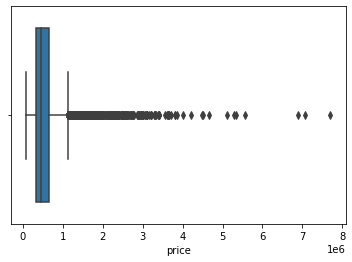

In [6]:
# Visualisasi boxplot untuk kolom price
sns.boxplot(x=house['price'])

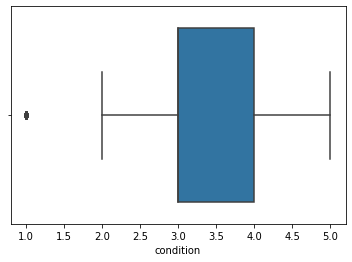

In [7]:
# Visualisasi boxplot untuk kolom condition
sns.boxplot(x=house['condition'])

In [8]:
# IQR method
Q1 = house.quantile(0.25)
Q3 = house.quantile(0.75)
IQR=Q3-Q1
house=house[~((house<(Q1-1.5*IQR))|(house>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
house.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


(14934, 21)

<h2> EDA - Analisis Univariate <h2>

Analisis univariate merupakan proses untuk mengeksplorasi dan menjelaskan setiap variabel dalam kumpulan data secara terpisah. 

In [9]:
# Memisahkan fitur dataset menjadi 2, yaitu numerical dan categorical
numerical = house.select_dtypes(include=np.number).columns.tolist()
categorical = house.select_dtypes(include=["object"]).columns.tolist()

In [10]:
numerical

['id',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [11]:
categorical

['date']

                 jumlah sampel  persentase
20140623T000000             93         0.6
20140625T000000             91         0.6
20150428T000000             89         0.6
20150414T000000             88         0.6
20140716T000000             88         0.6
...                        ...         ...
20150509T000000              1         0.0
20141115T000000              1         0.0
20140517T000000              1         0.0
20141207T000000              1         0.0
20140727T000000              1         0.0

[367 rows x 2 columns]


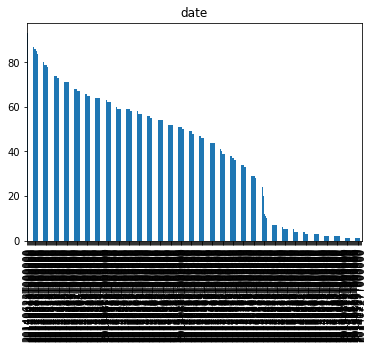

In [12]:
# Analisa fitur kategori
feature = categorical[0]
count = house[feature].value_counts()
percent = 100*house[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

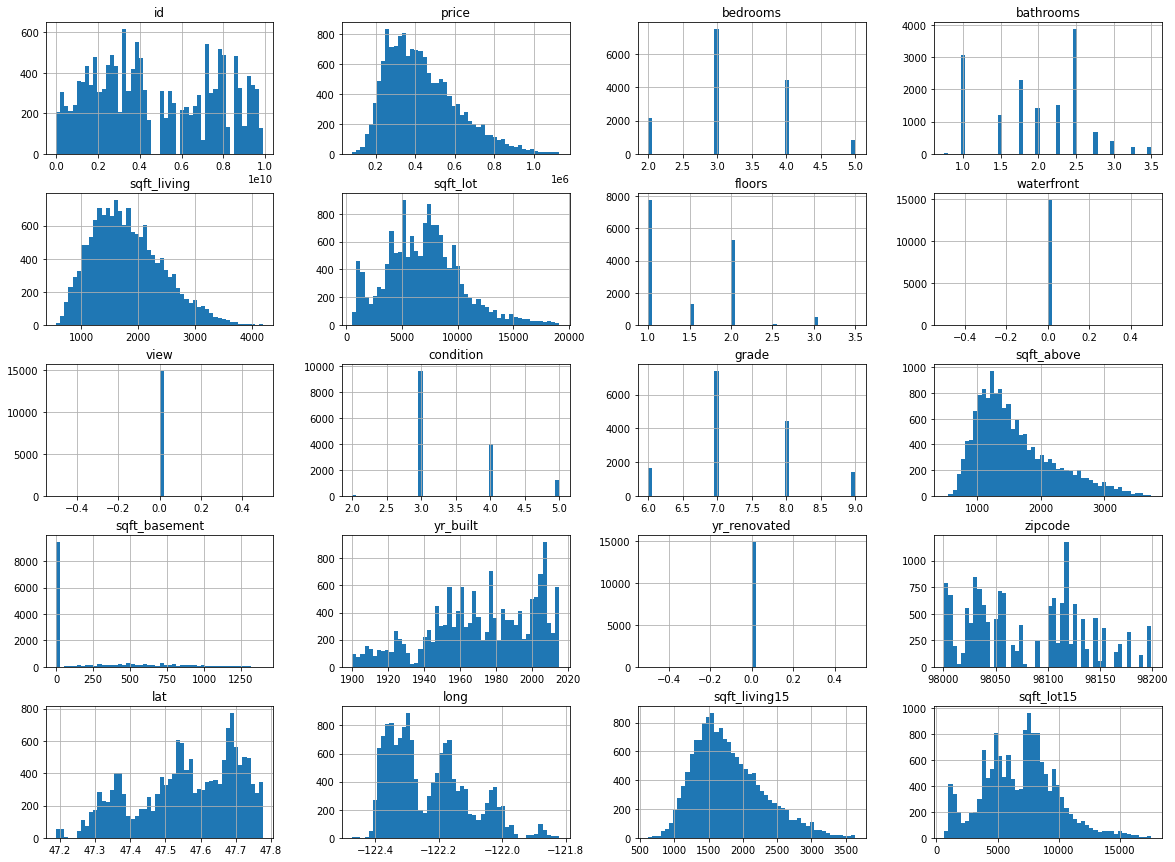

In [13]:
# Analisa fitur numerical
house.hist(bins=50, figsize=(20,15))
plt.show()

Dari visualisasi pairplot diatas, kita bisa melihat bahwa :  

*   Jumlah terbanyak unit rumah memiliki 3 bedroom/kamar 
*   Jumlah rumah yang memiliki 3 lantai kurang dari 1000 unit
*   Sekitar 7000 unit rumah memiliki tingkat konstruksi dan desain rata-rata (grade=7)





In [14]:
# Menghapus fitur yang hanya memiliki 1 nilai (yaitu 0) karena tidak memiliki korelasi dengan fitur lainnya
house = house.drop(columns=['view','yr_renovated','waterfront'])

<h2> Analisis Multivariate <h2>

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data.

Text(0.5, 1.0, 'Rata-rata price(harga) Relatif terhadap - date')

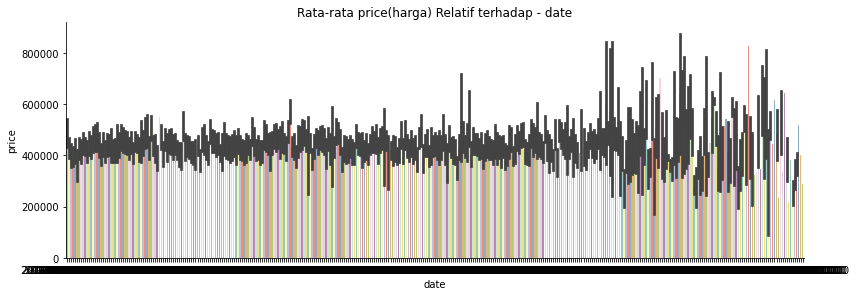

In [15]:
# Analisa fitur price dengan fitur date
sns.catplot(x='date', y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=house, palette="Set3")
plt.title("Rata-rata price(harga) Relatif terhadap - {}".format('date'))

Fitur date memiliki terlalu banyak variasi, sehingga fitur date tidak mempengaruhi fitur price

In [16]:
# Menghapus fitur date 
house = house.drop(columns=['date'])

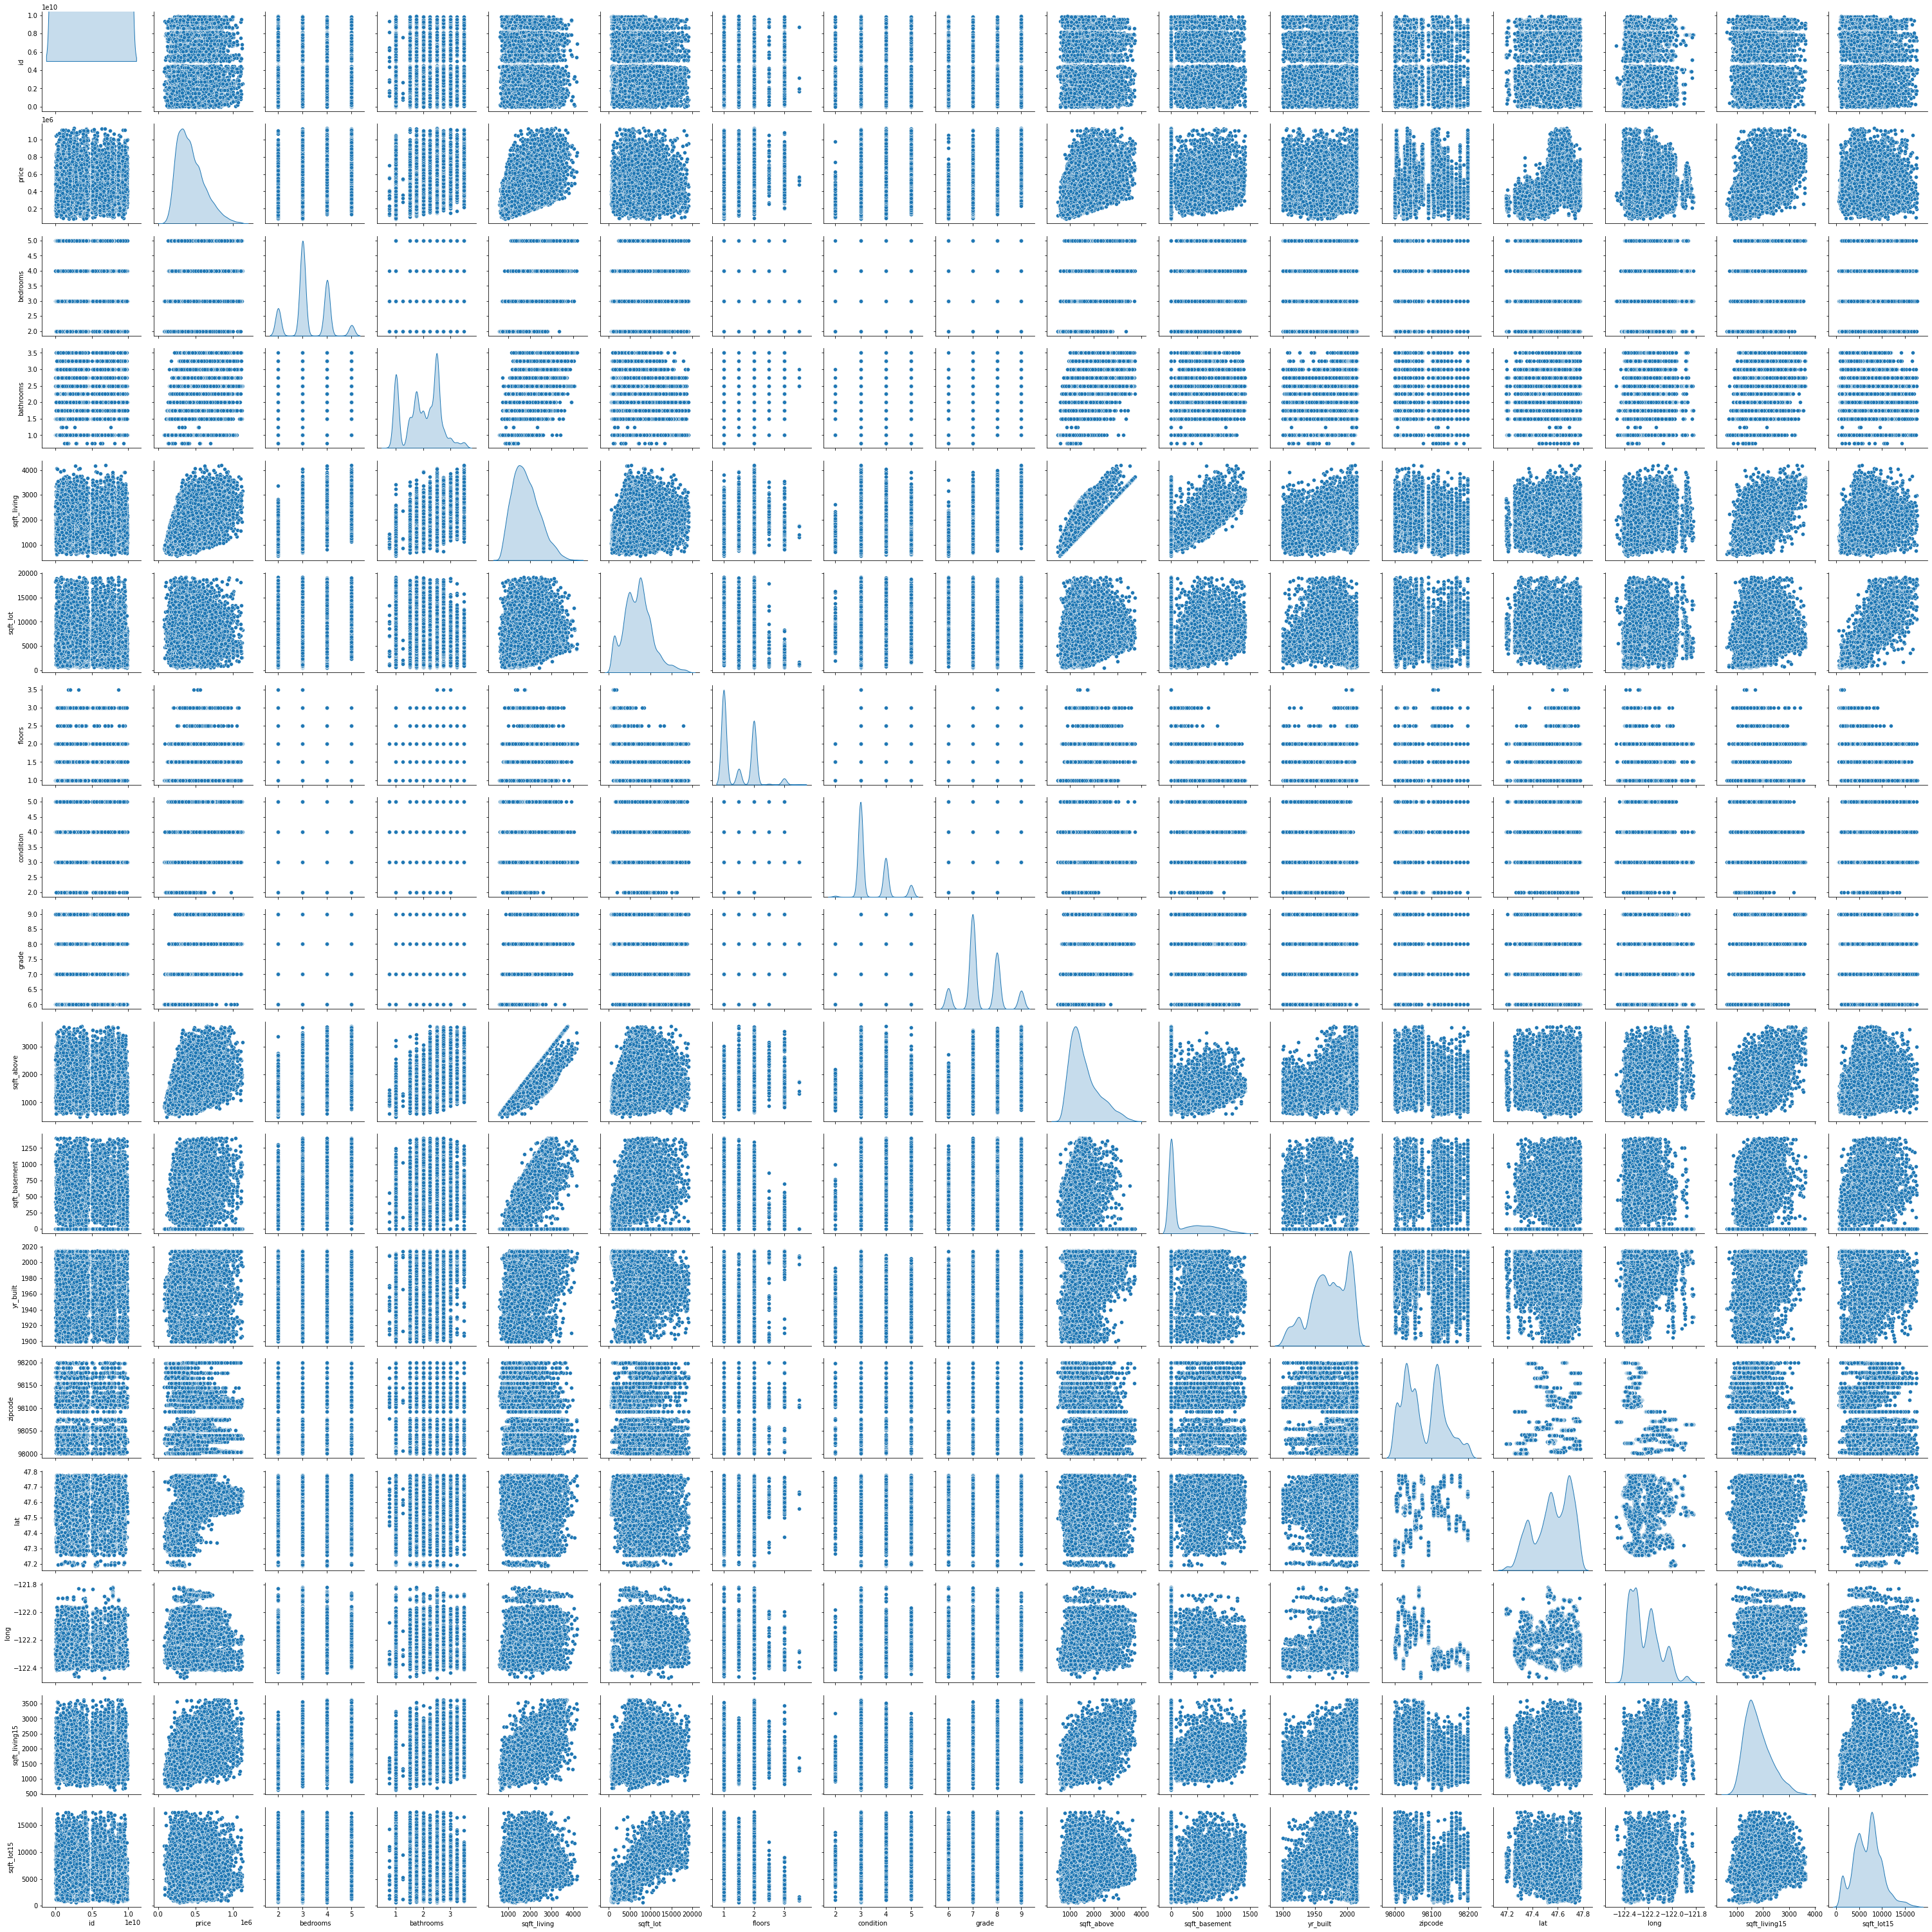

In [17]:
# Analisa hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(house, diag_kind = 'kde')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


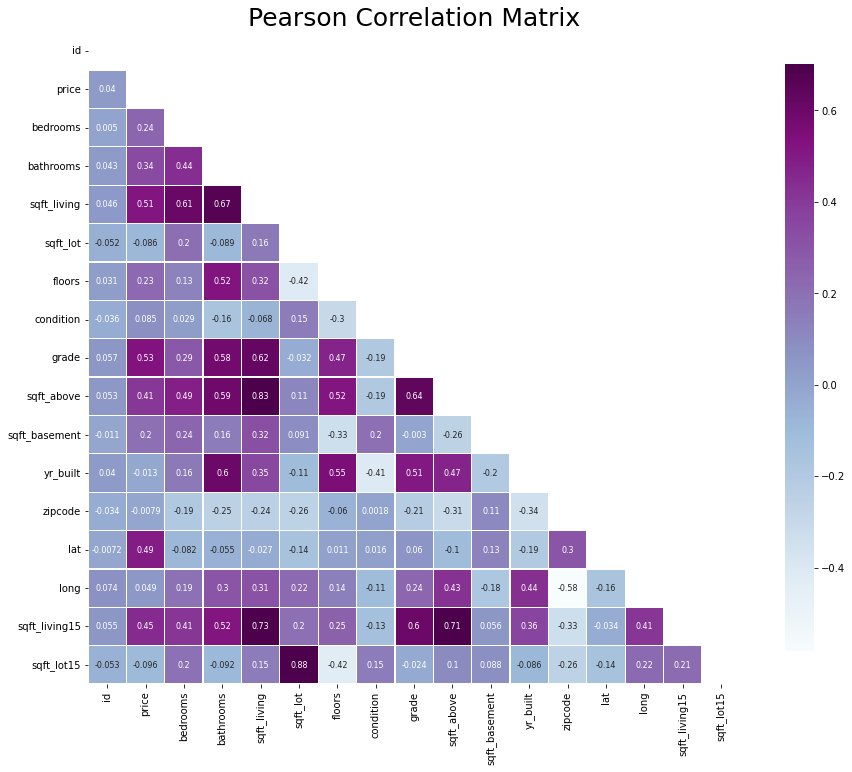

In [18]:
# Analisa hubungan antar fitur numerik dengan fungsi heatmap
mask = np.zeros_like(house.corr().abs(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(house.corr(), linewidth=0.25, vmax=0.7, square=True, cmap='BuPu', 
           linecolor='w', annot=True, annot_kws={'size': 8}, mask=mask, cbar_kws={'shrink': .9});

In [19]:
# Mencari fitur yang mempunyai nilai korelasi tinggi terhadap fitur 'price' sebagai fitur TARGET 
price_corr = house.corr()['price']
low_features = price_corr[(price_corr<0.25)]
house.drop(low_features.index,axis=1,inplace=True)
print('Training Features shape:',house.shape)
house.columns

Training Features shape: (14934, 7)


Index(['price', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat',
       'sqft_living15'],
      dtype='object')

Fitur yang memiliki korelasi cukup kuat dengan fitur "price" adalah :
'bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'lat', 'sqft_living15'

<h2> Data Preparation <h2>

Transformasi data menjadi bentuk yang cocok untuk proses pemodelan.

<h4> Train-Test Split <h4>

 Proporsi pembagian data latih dan uji adalah 90:10

In [20]:
from sklearn.model_selection import train_test_split
 
X = house.drop(["price"],axis =1)
y = house["price"]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [21]:
#cek jumlah sampel
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 14934
Total # of sample in train dataset: 13440
Total # of sample in test dataset: 1494


<h4> Standarisasi <h4>

Standarisasi menggunakan teknik StandarScaler dari library Scikitlearn, 

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

In [36]:
from sklearn.preprocessing import StandardScaler
 
features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above',
       'lat', 'sqft_living15']
scaler = StandardScaler()
scaler.fit(X_train[features])
X_train[features] = scaler.transform(X_train.loc[:, features])
X_train[features].head()

bathrooms  sqft_living     grade  sqft_above       lat  sqft_living15
2999    0.045293     0.269495 -0.472467   -0.341751  0.941730      -1.055138
7596   -0.341701    -0.477392 -0.472467   -0.108846 -0.712313      -0.288408
13659  -0.341701    -1.045676 -0.472467   -0.691109  1.334310      -1.173097
6108   -1.502683    -1.581487 -1.714389   -1.240099  0.886149      -0.799562
9775    1.206276     1.341116  0.769456    0.273783  0.527340       0.242405

<h2> Model Development <h2>

Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.
Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

1.   K-Nearest Neighbors
2.   Random Forest
3.   Boosting Algorithm


In [37]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['KNN', 'RandomForest', 'Boosting'], 
                      columns=['train_mse', 'test_mse'])

K-Nearest Neighbor

In [38]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['KNN','train_mse'] = mean_squared_error(y_true=y_train, y_pred=knn.predict(X_train))/1e3
models.loc['KNN','test_mse'] = mean_squared_error(y_true=y_test, y_pred=knn.predict(X_test))/1e3 

Random Forest

In [39]:
randomforest = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
randomforest.fit(X_train, y_train)
 
models.loc['RandomForest','train_mse'] = mean_squared_error(y_true=y_train, y_pred=randomforest.predict(X_train))/1e3
models.loc['RandomForest','test_mse'] = mean_squared_error(y_true=y_test, y_pred=randomforest.predict(X_test))/1e3        

Boosting Algorithm

In [40]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)

models.loc['Boosting','train_mse'] = mean_squared_error(y_true=y_train, y_pred=boosting.predict(X_train))/1e3
models.loc['Boosting','test_mse'] = mean_squared_error(y_true=y_test, y_pred=boosting.predict(X_test))/1e3

In [41]:
models

train_mse          test_mse
KNN             6422247.74869  175566180.734988
RandomForest   1649306.154105    88883752.13927
Boosting      10655061.083537   42409709.805507

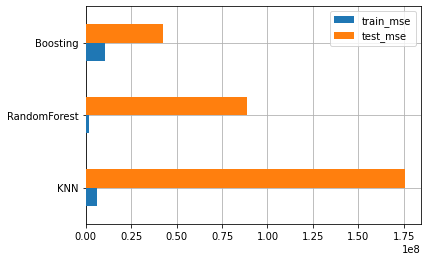

In [42]:
fig, ax = plt.subplots()
models.sort_values(by='test_mse', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [46]:
# Prediksi dengan 10 data
prediksi = X_test.iloc[100:110].copy()
pred_dict = {'y_true':y_test[100:110]}
model_dict = {'KNN': knn, 'RandomForest': randomforest, 'Boosting': boosting}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

y_true  prediksi_KNN  prediksi_RandomForest  prediksi_Boosting
17130  325000.0      817609.0               676813.0           541086.1
17541  768000.0      817609.0               677386.4           541086.1
20183  260000.0      817609.0               677386.4           541086.1
6774   480000.0      834614.0               683088.2           541086.1
7727   152000.0      817609.0               676813.0           541086.1
19391  429950.0      817609.0               685322.2           541086.1
11055  399000.0      817609.0               676813.0           541086.1
14088  335000.0      817609.0               677386.4           541086.1
19821  480000.0      817609.0               677386.4           541086.1
7309   335000.0      834614.0               676813.0           541086.1